In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import shutil

# 경고 뜨지 않게...
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False
# 매직명령어 => 쥬피터노트북에서 그래프 삽입 기능 
%matplotlib inline
# 글꼴 선명화 
%config InlineBackend.figure_format = 'retina'

# 랜덤 모듈
import random

# 학습 모델 저장 및 복원
import pickle

# 딥러닝 라이브러리
import tensorflow as tf
# 신경망 모델을 관리하는 객체
from tensorflow.keras.models import Sequential
# 선형 회귀 레이어
from tensorflow.keras.layers import Dense
# 활성화 함수를 정의하는 객체
from tensorflow.keras.layers import Activation

# CNN : 커널을 통해 합성곱을 구하는 것. 이미지의 특징이 두드러 지게 한다.
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv1D

# MaxPooling : 커널내에서 가장 큰 값을 추출하는 방식으로 불필요한 부분을 제거한다.
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import MaxPool1D

# 1차원으로 변환하는 것
from tensorflow.keras.layers import Flatten

# Dropout : 이미자나 영상, 음파 등의 데이터는 오랫동안 학습을 진행 시켜야 한다.
# 하지만 너무 빨리 과적합이 발생되면 조기 중단 때문에 학습 횟수가 줄어들 수 있다.
# 이에 은닉의 노드를 일부 사용하지 않으므로써 과적합이 빨리 오는 것을 예방하고
# 오랫동안 학습이 가능하다.
from tensorflow.keras.layers import Dropout

# Embadding : 단어의 수를 조정한다.
from tensorflow.keras.layers import Embedding

# RNN(LSTM)
from tensorflow.keras.layers import LSTM

# 원핫 인코딩을 수행하는 함수
from tensorflow.keras.utils import to_categorical

# 저장된 학습모델을 복원한다.
from tensorflow.keras.models import load_model

# 모델을 자동 저장한다.
from tensorflow.keras.callbacks import ModelCheckpoint
# 성능이 더이상 좋아지지 않을 경우 중단 시킨다.
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

# 문장을 잘라준다.
from tensorflow.keras.preprocessing.text import Tokenizer
# 모든 문장 데이터의 단어 데이터의 수를 동일한 수로 맞춰준다.
from tensorflow.keras.preprocessing.sequence import pad_sequences
# 문자열을 가지고 단어 사전을 만들어준다.
from tensorflow.keras.preprocessing.text import text_to_word_sequence

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# 문자열 => 숫자
from sklearn.preprocessing import LabelEncoder

# 전체데이터를 학습용과 검증으로 나눈다.
from sklearn.model_selection import train_test_split

# 랜덤시드 설정
# 데이터를 랜덤하게 섞거나 가중치를 랜덤하게 설정하는 등..
# 작업에서 랜덤을 적용하는 경우가 더러 있다.
# 이에, 시드를 고정시킨다.
random_seed = 1
np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

# 현재 프로젝트에서 GPU 메모리 사용을 필요한 만큼만 쓸 수 있도록 한다.
# 컴퓨터에 있는 GPU 정보들을 가져온다.

gpus = tf.config.experimental.list_physical_devices('GPU')
# gpu가 있다면...
if len(gpus) > 0 :
    try :
        for gpu in gpus :
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e :
        print(e)

In [2]:
# 로이터 데이터 불러오기
from tensorflow.keras.datasets import reuters

In [3]:
# num_words : 기사 하나당 최대 단어 개수
# test_split : 검증 데이터 비율
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

In [4]:
# 결과 데이터 확인
pd.Series(y_train).value_counts().sort_index()

0       55
1      432
2       74
3     3159
4     1949
5       17
6       48
7       16
8      139
9      101
10     124
11     390
12      49
13     172
14      26
15      20
16     444
17      39
18      66
19     549
20     269
21     100
22      15
23      41
24      62
25      92
26      24
27      15
28      48
29      19
30      45
31      39
32      32
33      11
34      50
35      10
36      49
37      19
38      19
39      24
40      36
41      30
42      13
43      21
44      12
45      18
dtype: int64

In [5]:
# 카테고리 개수
a1 = len(pd.Series(y_train).value_counts())
print(f'전체 카테고리 개수 : {a1}')

# 학습용 개수
a2 = len(X_train)
print(f'학습 데이터 개수 : {a2}')

# 검증용 뉴스 기사 개수
a3 = len(X_test)
print(f'검증 데이터 개수 : {a3}')

전체 카테고리 개수 : 46
학습 데이터 개수 : 8982
검증 데이터 개수 : 2246


In [6]:
# 기사 하나 출력
print(X_train[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [7]:
# 각 문장의 단어수기 다르므로 이를 똑같이 맞춰준다.
X_train = pad_sequences(X_train)
X_test = pad_sequences(X_test)

In [8]:
print(X_train[0])
print(len(X_train[0]))

[ 0  0  0 ... 15 17 12]
2376


In [9]:
print(X_test[0])
print(len(X_test[0]))

[  0   0   0 ... 510  17  12]
1032


In [10]:
# 결과데이터 원핫 인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
# 2진 분류 옵션들
# out_nodes = 1
# loss_function = 'binary_crossentropy'
# activation_function = 'sigmoid'

# 다중 분류 옵션들
out_nodes = len(y_train[0])
loss_function = 'categorical_crossentropy'
activation_function = 'softmax'

# 회귀
# 출력 결과를 하나만 뽑아서 Series로 나왔다면...
# 1로 설정한다.
# if type(y) is pd.core.series.Series:
#     out_nodes = 1
# else : 
#     out_nodes = y.shape[1]
    
# loss_function = 'mean_squared_error'

In [12]:
# 모델 설정
model = Sequential()

# 문장당 최대 1000개의 단어를 100개로 줄인다.
model.add(Embedding(1000, 100))

# LSTM => 위에서 100으로 줄였기 때문에 100을 설정한다.
model.add(LSTM(100))
model.add(Activation('tanh'))

# 출력층
model.add(Dense(out_nodes))
model.add(Activation(activation_function))

In [13]:
# 모델 컴파일
model.compile(loss=loss_function, optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         100000    
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dense (Dense)               (None, 46)                4646      
                                                                 
 activation_1 (Activation)   (None, 46)                0         
                                                                 
Total params: 185,046
Trainable params: 185,046
Non-trainable params: 0
_________________________________________________________________


In [14]:
# 학습모델을 저장할 경로
path = './model/31'

# 만약 폴더가 있다면 삭제한다.
if os.path.isdir(path):
    shutil.rmtree(path)

# 폴더를 생성한다.
os.makedirs(os.path.join(path))

In [15]:
path1 = path + '/{epoch}-{val_loss}.h5'
path2 = path + '/best_model.h5'

# 저장콜백
call1 = ModelCheckpoint(filepath=path1, monitor='val_loss', save_best_only=True)
call2 = ModelCheckpoint(filepath=path2, monitor='val_loss', save_best_onlu=True)

In [16]:
# 조기 중단
call3 = [EarlyStopping(monitor='val_loss', patience=50), TensorBoard(log_dir=path +'./logs', histogram_freq=1)]

In [17]:
# 학습
# validation_split : 주어진 데이터에서 사용할 검증데이터 비율
history = model.fit(X_train, y_train, epochs=200000, batch_size=100,
                    validation_data=[X_test, y_test], callbacks=[call1, call2, call3])

Epoch 1/200000
90/90 [==============================] - 22s 205ms/step - loss: 2.6203 - accuracy: 0.3370 - val_loss: 2.4079 - val_accuracy: 0.3620
Epoch 2/200000
90/90 [==============================] - 18s 203ms/step - loss: 2.1468 - accuracy: 0.4487 - val_loss: 2.0131 - val_accuracy: 0.4929
Epoch 3/200000
90/90 [==============================] - 18s 200ms/step - loss: 1.9775 - accuracy: 0.4911 - val_loss: 1.9279 - val_accuracy: 0.5209
Epoch 4/200000
90/90 [==============================] - 19s 208ms/step - loss: 1.8279 - accuracy: 0.5294 - val_loss: 1.9706 - val_accuracy: 0.5565
Epoch 5/200000
90/90 [==============================] - 19s 209ms/step - loss: 1.8547 - accuracy: 0.5281 - val_loss: 1.8155 - val_accuracy: 0.5454
Epoch 6/200000
90/90 [==============================] - 19s 215ms/step - loss: 1.7374 - accuracy: 0.5418 - val_loss: 1.7694 - val_accuracy: 0.5476
Epoch 7/200000
90/90 [==============================] - 19s 211ms/step - loss: 1.6644 - accuracy: 0.5699 - val_loss: 1

In [20]:
# 리스트를 추출한다.
loss_list = history.history['loss']
accuracy_list = history.history['accuracy']
val_loss_list = history.history['val_loss']
val_accuracy_list = history.history['val_accuracy']

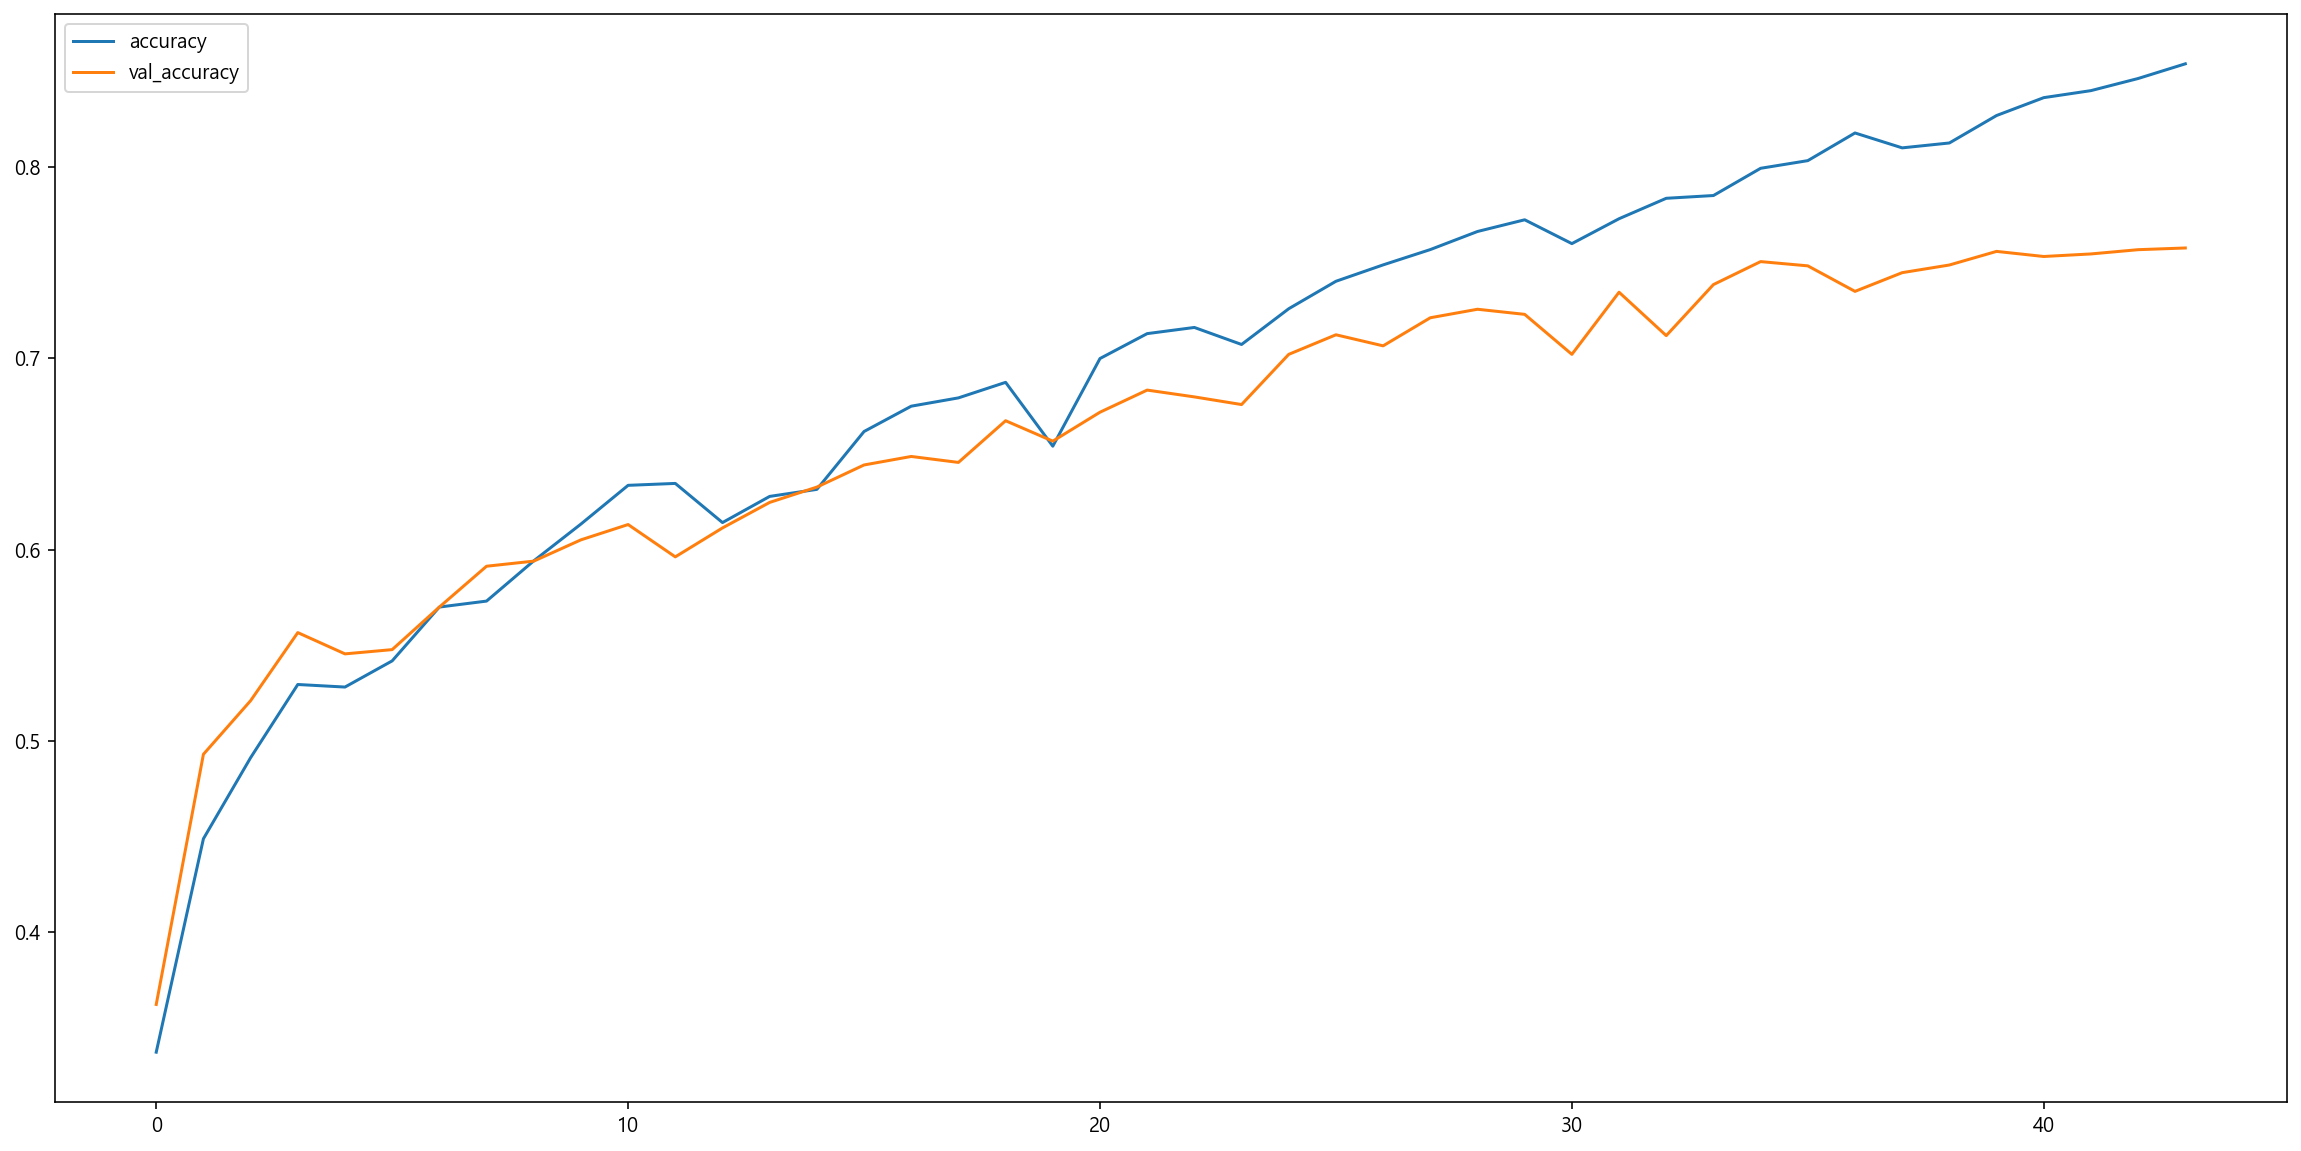

In [21]:
# 정확도 그래프
plt.figure(figsize=(20,10))
plt.plot(accuracy_list[:-50], label='accuracy')
plt.plot(val_accuracy_list[:-50], label = 'val_accuracy')
plt.legend()
plt.show()

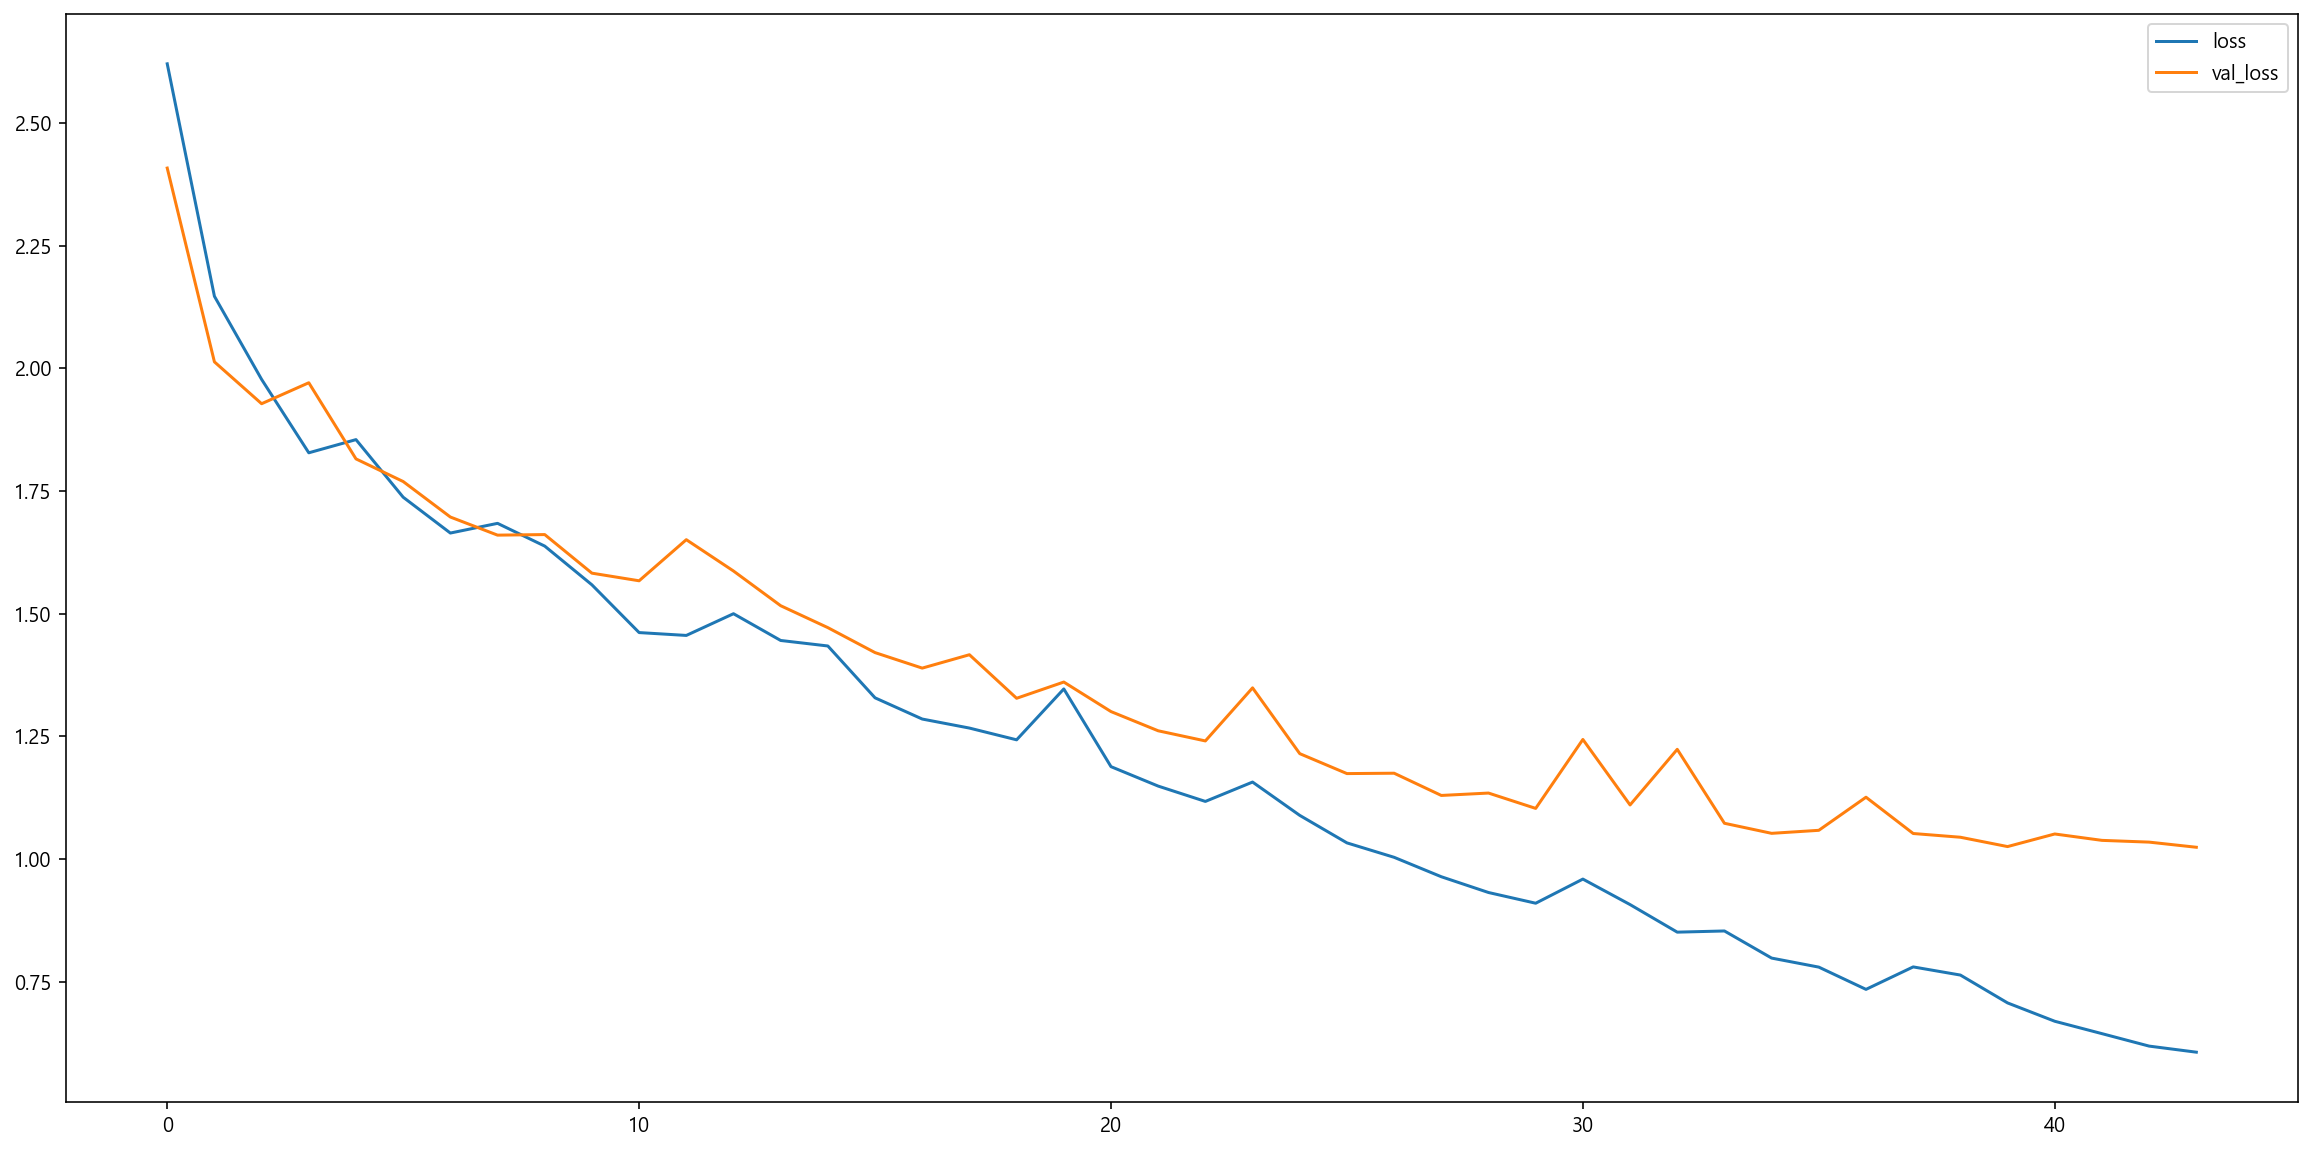

In [22]:
# 손실율 그래프
plt.figure(figsize=(20,10))
plt.plot(loss_list[:-50], label='loss')
plt.plot(val_loss_list[:-50], label = 'val_loss')
plt.legend()
plt.show()

In [34]:
# 모델을 가져온다.
best_model = load_model(path + '/best_model.h5')
best_model